<b> Zadanie 1 </b>  Porównać w języku Julia reprezentację bitową liczby 1/3 dla Float32, Float64 oraz liczby, 
która jest inicjalizowana jako Float32, a potem rzutowana na Float64.

In [2]:
x = 1/3
x_32 = Float32(x)
bits(x)

"0011111111010101010101010101010101010101010101010101010101010101"

In [3]:
bits(x_32)

"00111110101010101010101010101011"

In [5]:
bits(Float64(x_32))

"0011111111010101010101010101010101100000000000000000000000000000"

<b>Zadanie 2</b> Zbadać, jak zmienia się odległość między kolejnymi liczbami zminnoprzecinkowymi 
reprezentowanymi w komputerze za pomocą języka Julia. 
Narysować wykres używając Gadfly zależności odległości od wartości liczby dla zakresu  od 1.0 do 1000.0 z krokiem 1.0.

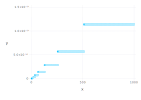

  likely near /home/marcin/.julia/JuliaPro-0.6.0.1/JuliaPro/pkgs-0.6.0.1/v0.6/IJulia/src/kernel.jl:31
  likely near /home/marcin/.julia/JuliaPro-0.6.0.1/JuliaPro/pkgs-0.6.0.1/v0.6/IJulia/src/kernel.jl:31
  likely near /home/marcin/.julia/JuliaPro-0.6.0.1/JuliaPro/pkgs-0.6.0.1/v0.6/IJulia/src/kernel.jl:31
  likely near /home/marcin/.julia/JuliaPro-0.6.0.1/JuliaPro/pkgs-0.6.0.1/v0.6/IJulia/src/kernel.jl:31
  likely near /home/marcin/.julia/JuliaPro-0.6.0.1/JuliaPro/pkgs-0.6.0.1/v0.6/IJulia/src/kernel.jl:31
  likely near /home/marcin/.julia/JuliaPro-0.6.0.1/JuliaPro/pkgs-0.6.0.1/v0.6/IJulia/src/kernel.jl:31
  likely near /home/marcin/.julia/JuliaPro-0.6.0.1/JuliaPro/pkgs-0.6.0.1/v0.6/IJulia/src/kernel.jl:31
  likely near /home/marcin/.julia/JuliaPro-0.6.0.1/JuliaPro/pkgs-0.6.0.1/v0.6/IJulia/src/kernel.jl:31
  likely near /home/marcin/.julia/JuliaPro-0.6.0.1/JuliaPro/pkgs-0.6.0.1/v0.6/IJulia/src/kernel.jl:31
  likely near /home/marcin/.julia/JuliaPro-0.6.0.1/JuliaPro/pkgs-0.6.0.1/v0.6/IJul

In [9]:
x_val = 1:1000
y_val = [eps(Float64(x)) for x in x_val]

using Gadfly
Gadfly.push_theme(:default)
plot(x=x_val, y=y_val)

<b>Zadanie 3</b> Jedną z bibliotek numerycznych, jaką będziemy używać na zajęciach jest <a href="http://home.agh.edu.pl/~kzajac/dydakt/mownit/lab1/gsl.html">GSL</a> (język C). Korzystając ze <a href="https://www.gnu.org/software/gsl/doc/html/ieee754.html"> wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych</a> zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?

Po wykonaniu kodu znajdującego się w 3_gsll/gsl_tryout.c zaobserwowano, że cecha przestaje być znormalizowana, gdy mantysa osiąga wartość -1022, czyli nieco ponad -(2^10).

Po osiągnięciu tej wartości (i ciągłym dzieleniu liczby przez 2), cecha przestaje być znormalizowana i maleje aż do momentu, gdy osiągnie wartość zero. Na tym etapie mantysa nie zmienia swej wartości (-1022) aż do momentu, gdy cecha == 0.


<b>Zadanie 4</b> Wymyślić własny przykład algorytmu niestablinego numerycznie. 
1. Zademostrować wersję niestabilną, pokazać, że działa źle.
2. Wyjaśnić, dlaczego działa źle.
3. Zademonstować wersję stabilną.
4. Język dowolny.

Dla n $\in {0, 1, ... 5} $ obliczmy całki:

$$y_n = \int_0^1 \frac{x^n}{x + 15} dx$$

Dla każdego n, funkcja nie przyjmuje wartości ujemnych na tym przedziale. Można więc się spodziewać, że również wartości całek oznaczonych na tym przedziale będą dodatnie.

Można zauważyć, że da się wyrazić wzór rekurencyjny:

$$y_n + 15y_{n-1} = \int_0^1 \frac{x^n + 15x^{n-1}}{x + 15} dx =  \int_0^1 \frac{x^{n-1}(x + 15)}{x + 15} dx = \frac{1}{n} $$

Stąd:

$$y_n = \frac{1}{n} - 15y_{n-1}$$

oraz: 

$$y_{n-1} = \frac{1}{15n} - \frac{1}{15}y_n$$

In [13]:
# Algorytm 1 (niestabilny)

# Obliczamy wartość całki dla n = 0:
x_h = 1
x_l = 0

y_0 = log(x_h + 15) - log(x_l + 15)
println(y_0) #y_0 powinno być bliskie 0.0645

y = [1 - 15*y_0] #definiujemy y_1

# a następnie, ze wzoru rekurencyjnego na y_n, obliczamy kilku kolejnych n:
for n = 1:5
    push!(y, 1/n - 15*y[n])
end
y 

# Jak widać, kolejnym wynikom coraz dalej jest do poprawności
# Ich wartości bezwzględne rosną, zaś wynikom zdarza się  przyjmować wartości ujemne.
# Dzieje się tak dlatego, że błąd y_n względem prawdziwego wyniku propagowany jest za każdym razem 15-krotnie.

0.06453852113757108


6-element Array{Float64,1}:
     0.0319222
     0.521167 
    -7.31751  
   110.096    
 -1651.19     
 24768.0      

In [21]:
# Algorytm 2 (stabilny)

# Ze wzoru rekurencyjnego 2 (wzór na y_{n-1}) widać, że błąd za każdym razem będzie dzielony przez 15.
# Z natury funkcji, którą całkujemy widać, że y_n powinno maleć ze wzrostem n. 
# Można zatem przyjąć, że y_6 będzie bliskie y_7

# y_6 ~= y_7 => y_6 = 1/(15 * 7) - (1/15) * y_6 => 

y_6 = 1/(15 * 7) * (1 + 1/15)
println(y_6) # istotnie, jest małe

y = [y_6]

for n = 0:5
    prepend!(y, 1/(15*(6-n)) - (1/15)*y[1]) # obliczamy kolejne wartości y_n od tyłu
end
y
# Jak widać, po obliczeniu kolejnych y_n, y[1] (czyli wyliczona wartość y_0) wynosi tyle, ile wiadomo, że powinna
# Widać zatem, że powyższy algorytm jest znacznie stabliiejszy od pierwszego.


0.010158730158730159
[0.0104339, 0.0101587]
[0.0126377, 0.0104339, 0.0101587]
[0.0158242, 0.0126377, 0.0104339, 0.0101587]
[0.0211673, 0.0158242, 0.0126377, 0.0104339, 0.0101587]
[0.0319222, 0.0211673, 0.0158242, 0.0126377, 0.0104339, 0.0101587]
[0.0645385, 0.0319222, 0.0211673, 0.0158242, 0.0126377, 0.0104339, 0.0101587]


7-element Array{Float64,1}:
 0.0645385
 0.0319222
 0.0211673
 0.0158242
 0.0126377
 0.0104339
 0.0101587